First we are importing the required Labraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import boxcox
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pickle

As the Dataset csv file is in the zip folder, first we have downloaded the same csv file from github, then uploaded in our local Jupyter Notebook and from there going to load in Data Frame as following

In [2]:
df=pd.read_csv("HR-Employee-Attrition.csv")

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Found No missing values (NaN values) in the dataset

In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

The dataset is either of Oject data type or Integer data type

As we have to predict the "Attrition", which is a Classification type Target. We are going to shift this Feature to the last column of the dataset

In [6]:
target=df.pop('Attrition')

In [7]:
df.insert(34, 'Attrition', target)

In [8]:
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,...,80,1,17,3,3,5,2,0,3,No
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,...,80,1,9,5,3,7,7,1,7,No
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,80,1,6,0,3,6,2,0,3,No
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,...,80,0,17,3,2,9,6,0,8,No


We are going to check the corelation of all the features with target variable "Attrition". So first chaning the Attrition to Numeric value by using Label Encoder, so that it can check via corr and heatmap methods

In [9]:
le=sklearn.preprocessing.LabelEncoder()

In [10]:
df['Attrition']=le.fit_transform(df['Attrition'])

In [11]:
dfcor=df.corr()
dfcor

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197,-0.010577
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.103369
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,-0.006846
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,-0.130016
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.169105


<AxesSubplot:>

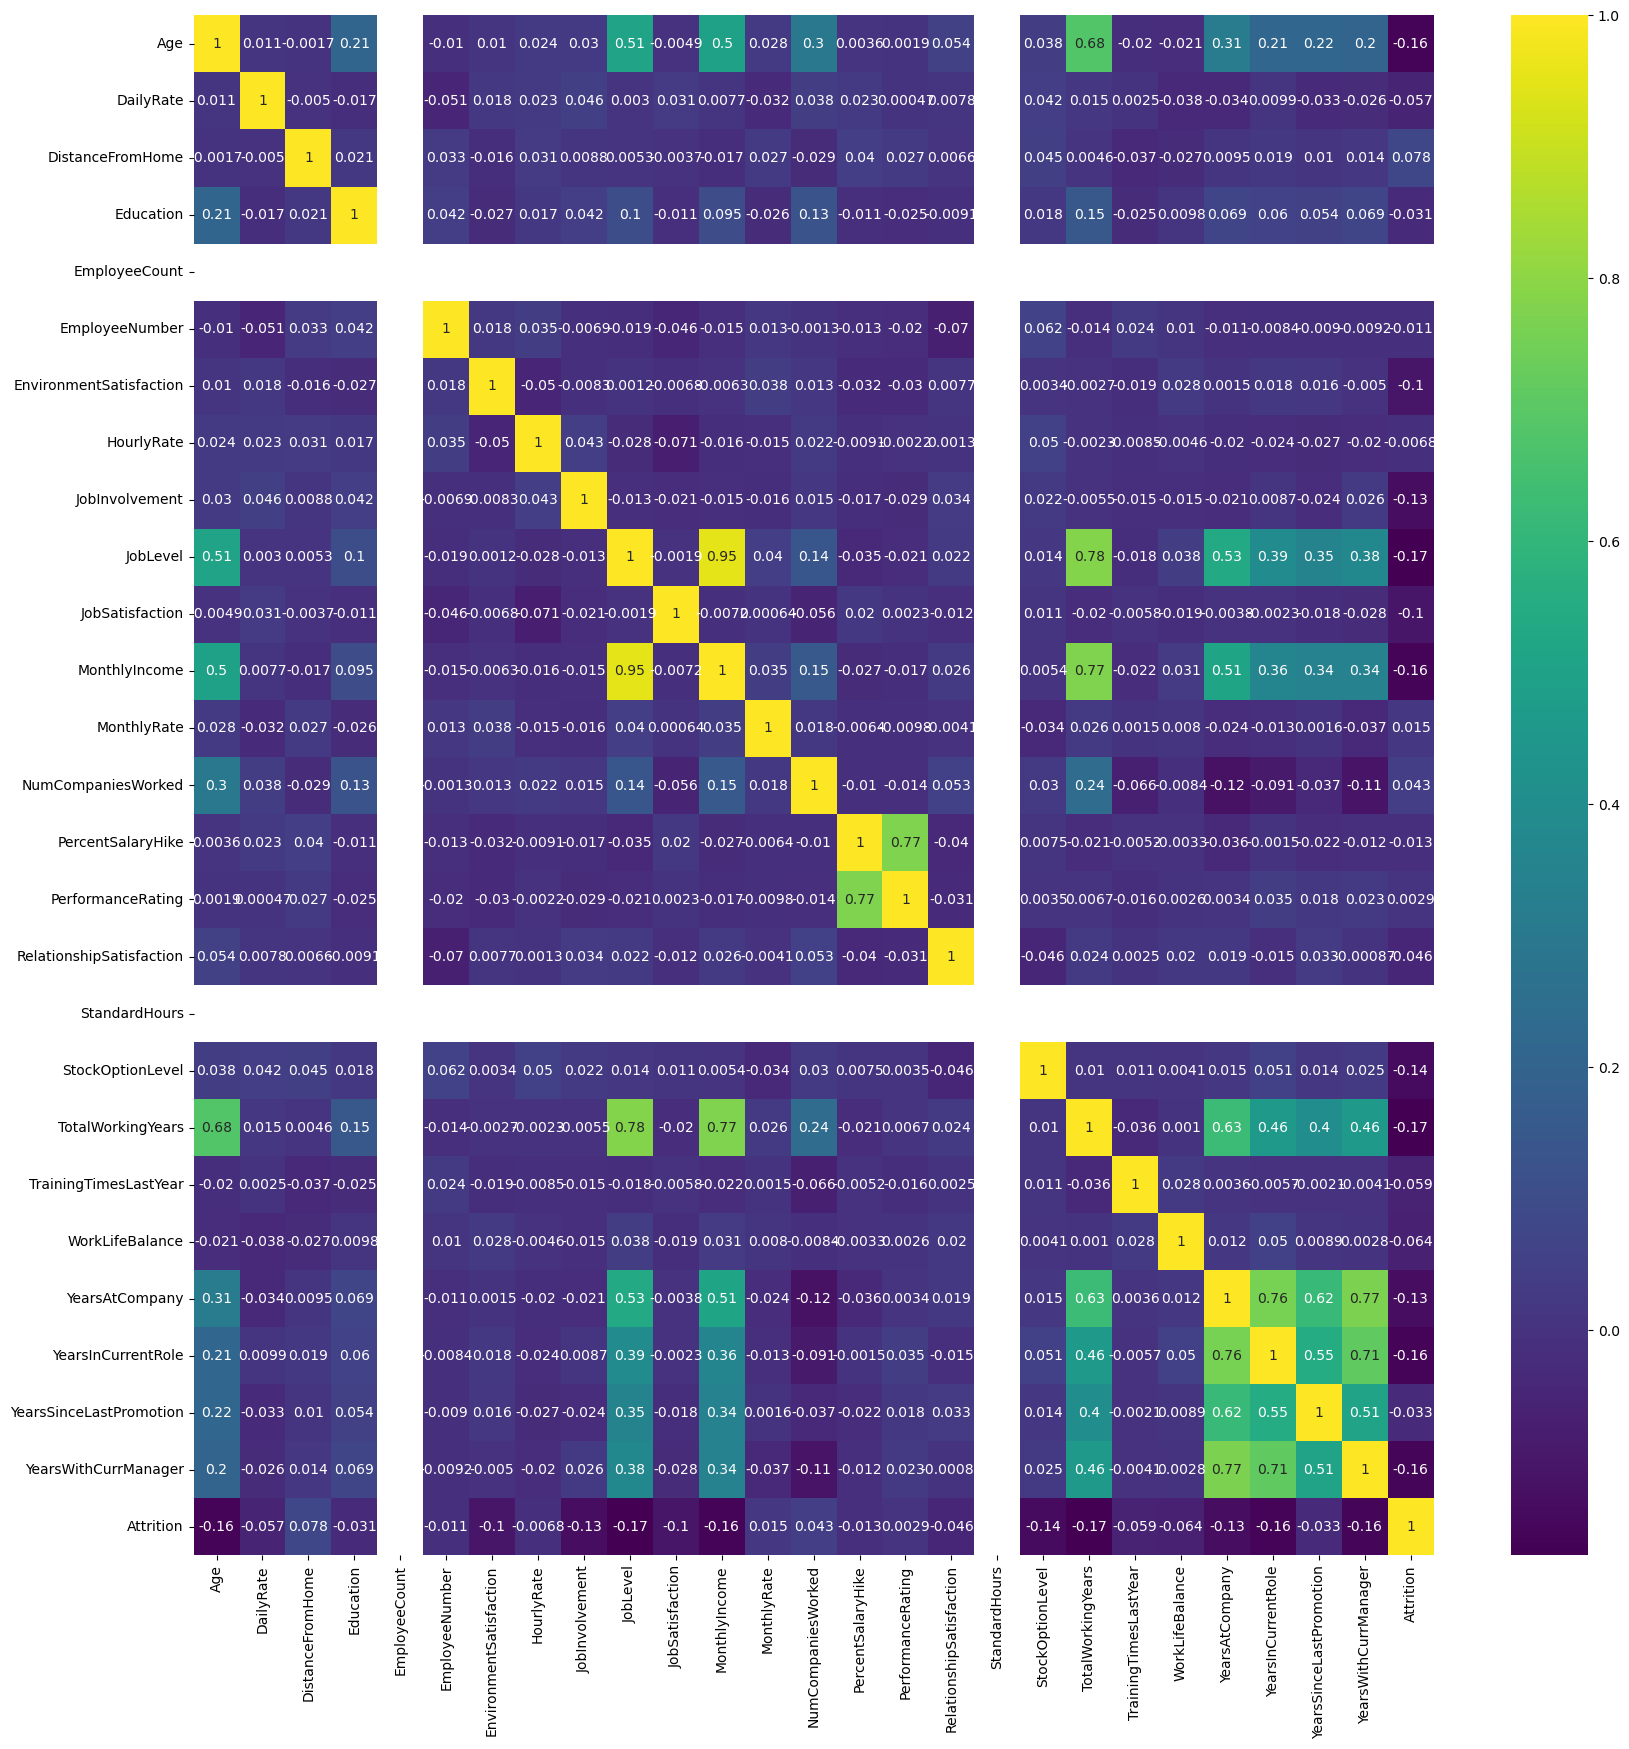

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(dfcor,annot=True,cmap='viridis')

In [13]:
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

By the above Heatmap, we found that 2 Features "EmployeeCount" & "StandardHours" have no relationship with any other Numeric Features in the Dataset, so we can drop these 2 columns

In [14]:
df.drop(['EmployeeCount'],axis=1,inplace=True)

In [15]:
df.drop(['StandardHours'],axis=1,inplace=True)

In [16]:
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition'],
      dtype='object')

In [17]:
df.shape

(1470, 33)

So the columns has been reduced from 35 to 33 columns

In [18]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.161224
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.367863
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000


We have observed that some Features like "Daily Rate", "Employee Number", Hourly Rate" etc. are spreaded data due to high standard deviation, also found not too much differences between mean and the median of almost all the features, but differences between the minimum values & 25% percentile and 75% percentile and maximum values are little higher for some of the features, so outliers possibilities are there.

Age                            AxesSubplot(0.125,0.786098;0.133621x0.0939024)
DailyRate                   AxesSubplot(0.285345,0.786098;0.133621x0.0939024)
DistanceFromHome             AxesSubplot(0.44569,0.786098;0.133621x0.0939024)
Education                   AxesSubplot(0.606034,0.786098;0.133621x0.0939024)
EmployeeNumber              AxesSubplot(0.766379,0.786098;0.133621x0.0939024)
EnvironmentSatisfaction        AxesSubplot(0.125,0.673415;0.133621x0.0939024)
HourlyRate                  AxesSubplot(0.285345,0.673415;0.133621x0.0939024)
JobInvolvement               AxesSubplot(0.44569,0.673415;0.133621x0.0939024)
JobLevel                    AxesSubplot(0.606034,0.673415;0.133621x0.0939024)
JobSatisfaction             AxesSubplot(0.766379,0.673415;0.133621x0.0939024)
MonthlyIncome                  AxesSubplot(0.125,0.560732;0.133621x0.0939024)
MonthlyRate                 AxesSubplot(0.285345,0.560732;0.133621x0.0939024)
NumCompaniesWorked           AxesSubplot(0.44569,0.560732;0.1336

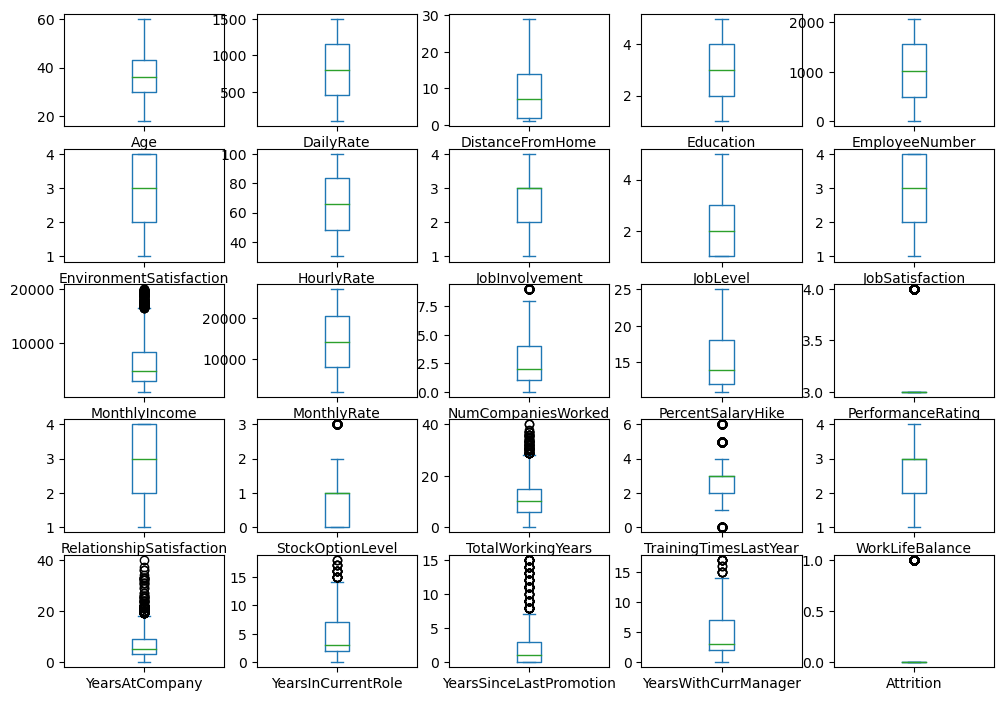

In [19]:
df.plot(kind='box',figsize=(12,12),layout=(7,5),subplots=True)

By using above Boxplot, we found that "Monthly Income", "Total Working Years", "Years At Company", "Years in current Role", "Years since last Promotion" & "Years with current Manager" having a lttle or more Outliers.

In [20]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
Attrition                   1.844366
dtype: float64

By the above Skewness check method also, we found for some of the Features the Skeness is above 1, So we are trying to overcome of these Skewness and Outliers by boxcox & numpy log transformation methods.

<AxesSubplot:xlabel='JobLevel', ylabel='Density'>

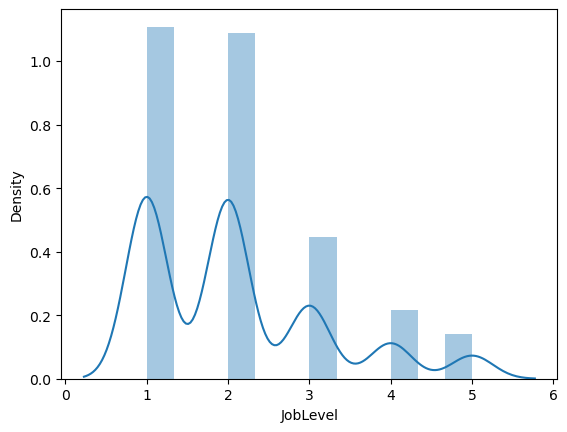

In [21]:
sns.distplot(df['JobLevel'])

In [22]:
df['JobLevel']=boxcox(df['JobLevel'],0)

<AxesSubplot:xlabel='JobLevel', ylabel='Density'>

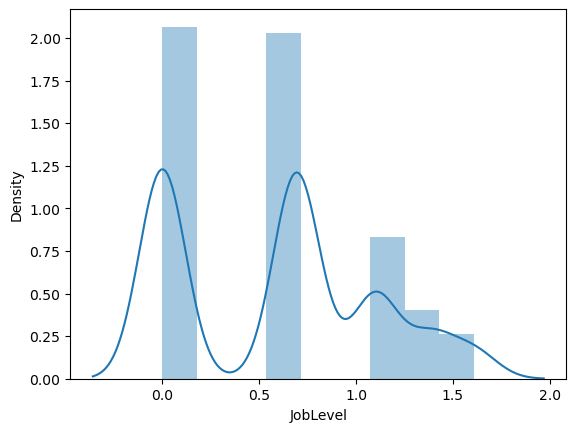

In [23]:
sns.distplot(df['JobLevel'])

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

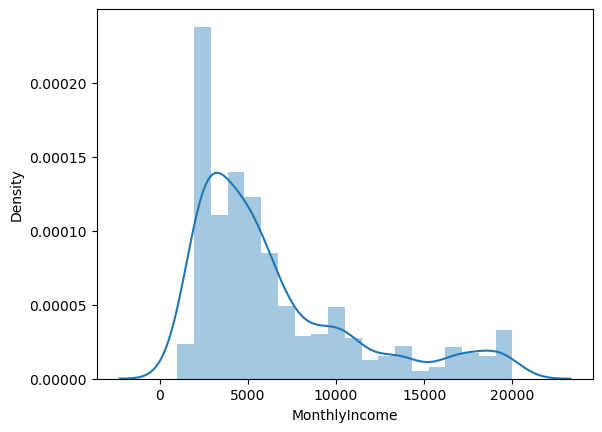

In [24]:
sns.distplot(df['MonthlyIncome'])

In [25]:
df['MonthlyIncome']=np.log(df['MonthlyIncome'])

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

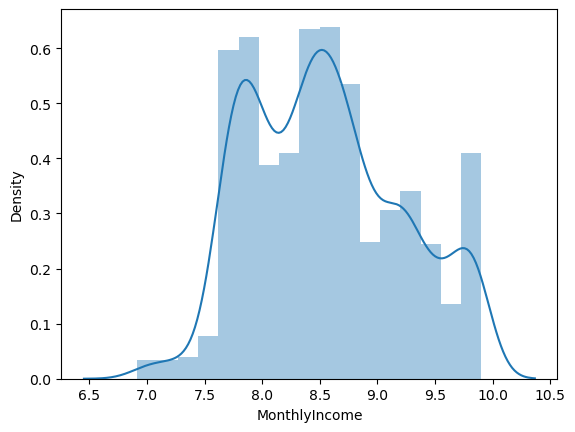

In [26]:
sns.distplot(df['MonthlyIncome'])

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Density'>

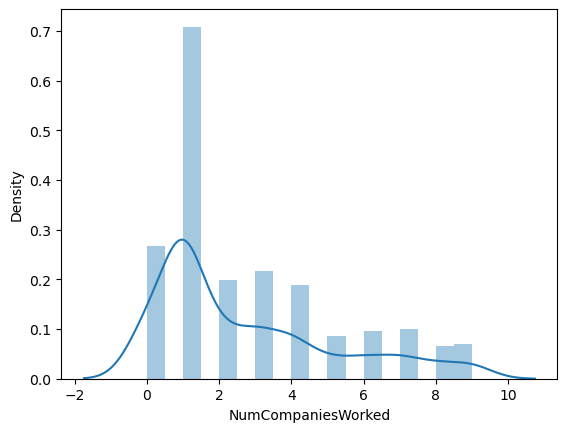

In [27]:
sns.distplot(df['NumCompaniesWorked'])

In [28]:
df['NumCompaniesWorked']=boxcox(df['NumCompaniesWorked'],0.5)

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Density'>

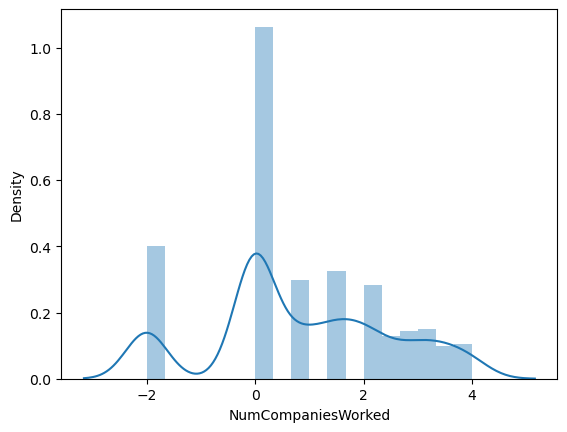

In [29]:
sns.distplot(df['NumCompaniesWorked'])

<AxesSubplot:xlabel='PerformanceRating', ylabel='Density'>

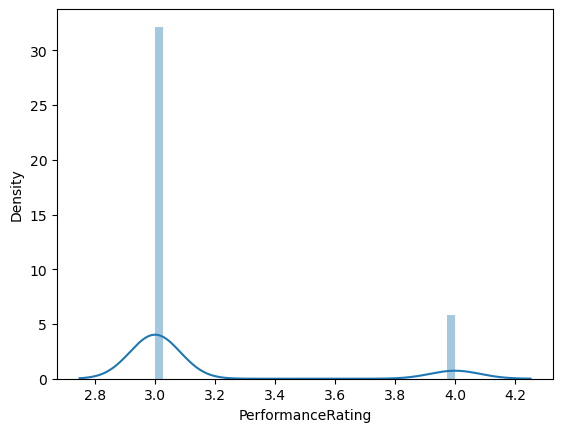

In [30]:
sns.distplot(df['PerformanceRating'])

In [31]:
df['PerformanceRating']=boxcox(df['PerformanceRating'],0.5)

<AxesSubplot:xlabel='PerformanceRating', ylabel='Density'>

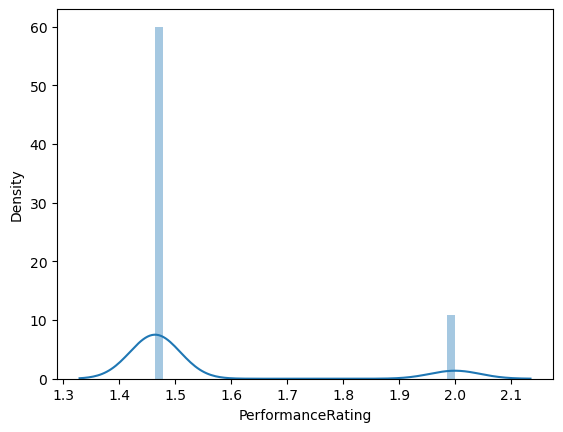

In [32]:
sns.distplot(df['PerformanceRating'])

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

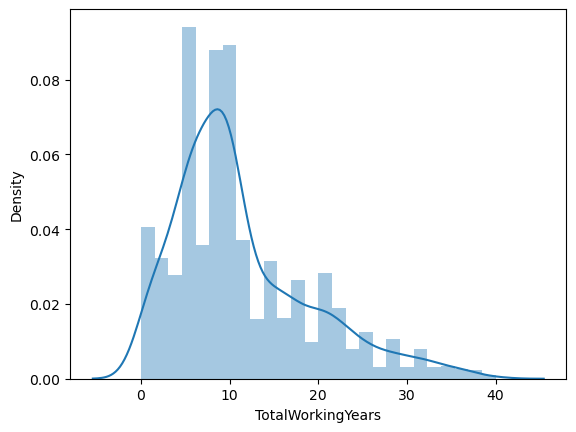

In [33]:
sns.distplot(df['TotalWorkingYears'])

In [34]:
df['TotalWorkingYears']=boxcox(df['TotalWorkingYears'],0.5)

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

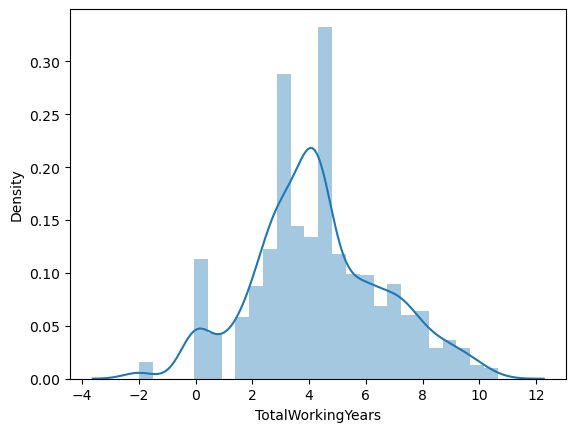

In [35]:
sns.distplot(df['TotalWorkingYears'])

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Density'>

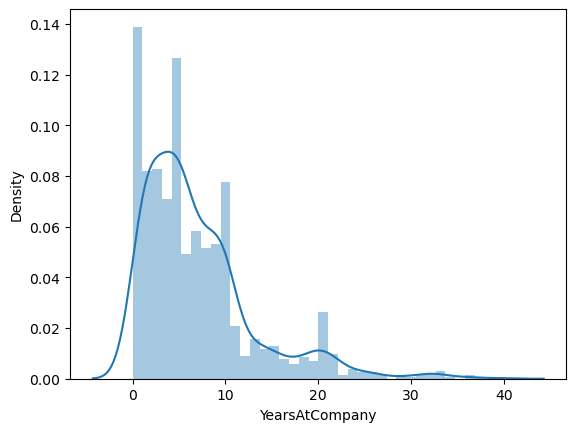

In [36]:
sns.distplot(df['YearsAtCompany'])

In [37]:
df['YearsAtCompany']=boxcox(df['YearsAtCompany'],0.5)

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Density'>

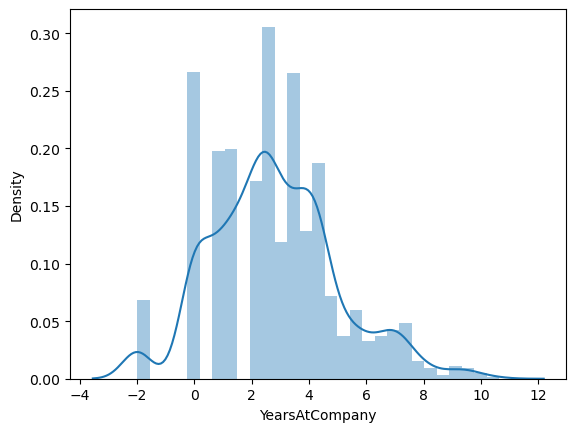

In [38]:
sns.distplot(df['YearsAtCompany'])

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Density'>

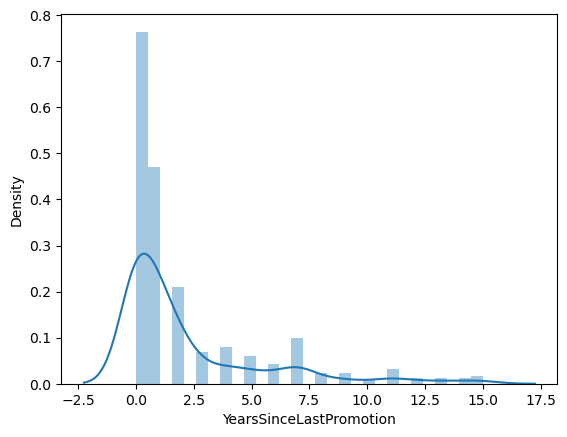

In [39]:
sns.distplot(df['YearsSinceLastPromotion'])

In [40]:
df['YearsSinceLastPromotion']=boxcox(df['YearsSinceLastPromotion'],0.5)

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Density'>

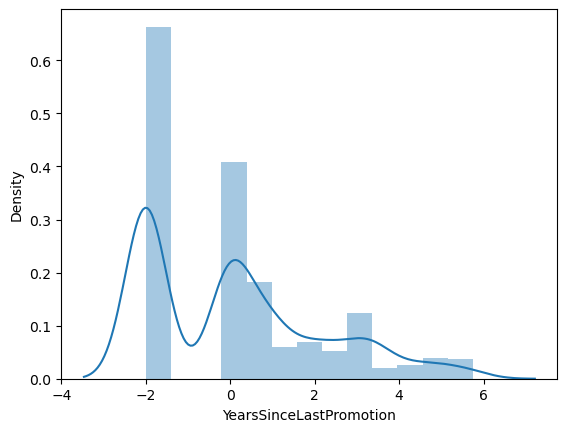

In [41]:
sns.distplot(df['YearsSinceLastPromotion'])

We have reduced the Skewness and Outliers for our Dataset Features and may again check the same by Boxplot also

Age                            AxesSubplot(0.125,0.786098;0.133621x0.0939024)
DailyRate                   AxesSubplot(0.285345,0.786098;0.133621x0.0939024)
DistanceFromHome             AxesSubplot(0.44569,0.786098;0.133621x0.0939024)
Education                   AxesSubplot(0.606034,0.786098;0.133621x0.0939024)
EmployeeNumber              AxesSubplot(0.766379,0.786098;0.133621x0.0939024)
EnvironmentSatisfaction        AxesSubplot(0.125,0.673415;0.133621x0.0939024)
HourlyRate                  AxesSubplot(0.285345,0.673415;0.133621x0.0939024)
JobInvolvement               AxesSubplot(0.44569,0.673415;0.133621x0.0939024)
JobLevel                    AxesSubplot(0.606034,0.673415;0.133621x0.0939024)
JobSatisfaction             AxesSubplot(0.766379,0.673415;0.133621x0.0939024)
MonthlyIncome                  AxesSubplot(0.125,0.560732;0.133621x0.0939024)
MonthlyRate                 AxesSubplot(0.285345,0.560732;0.133621x0.0939024)
NumCompaniesWorked           AxesSubplot(0.44569,0.560732;0.1336

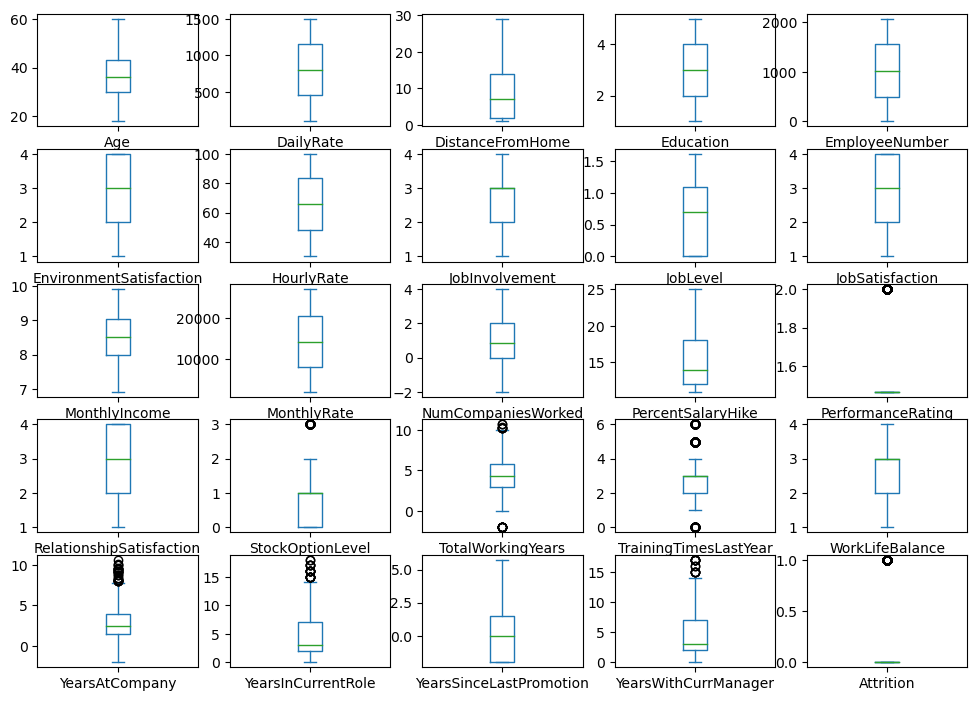

In [42]:
df.plot(kind='box',figsize=(12,12),layout=(7,5),subplots=True)

Some more Features are still having Outliers, so considering those also to reduce the Outliers

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Density'>

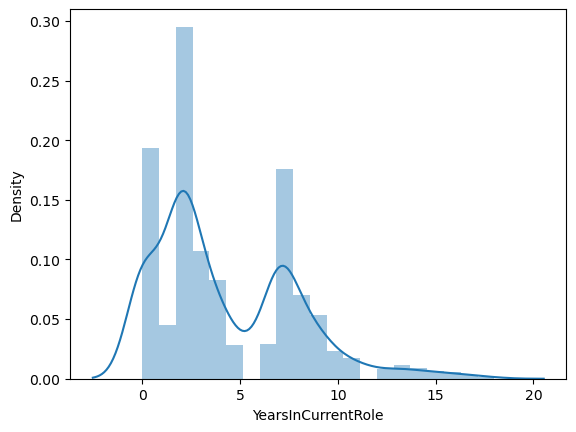

In [43]:
sns.distplot(df['YearsInCurrentRole'])

In [44]:
df['YearsInCurrentRole']=boxcox(df['YearsInCurrentRole'],0.5)

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Density'>

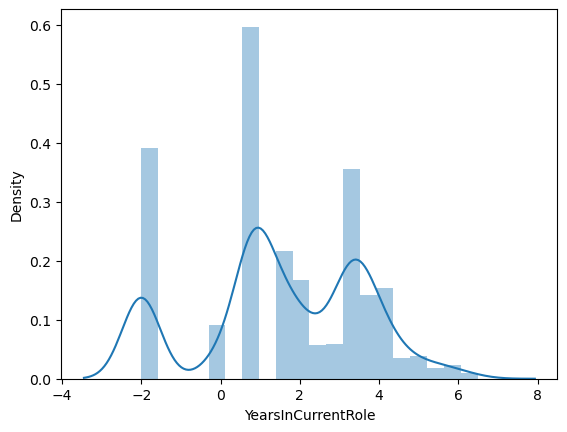

In [45]:
sns.distplot(df['YearsInCurrentRole'])

<AxesSubplot:xlabel='YearsInCurrentRole'>

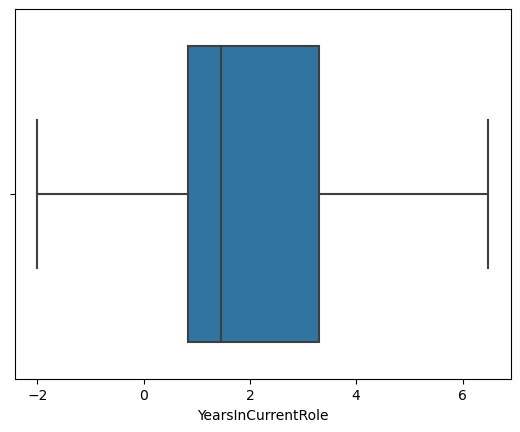

In [46]:
sns.boxplot(df['YearsInCurrentRole'])

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Density'>

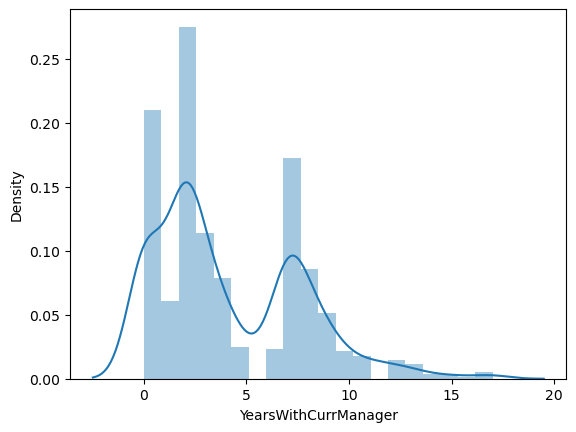

In [47]:
sns.distplot(df['YearsWithCurrManager'])

In [48]:
df['YearsWithCurrManager']=boxcox(df['YearsWithCurrManager'],0.5)

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Density'>

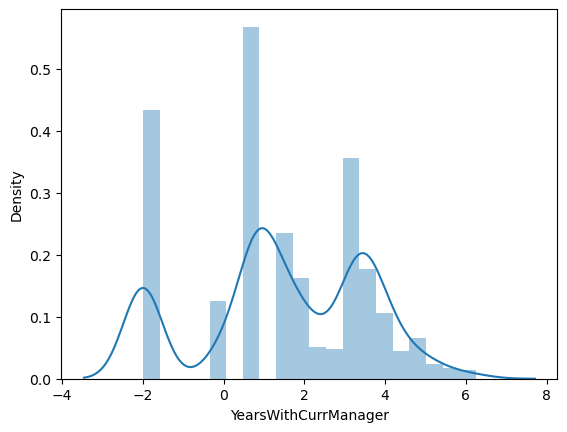

In [49]:
sns.distplot(df['YearsWithCurrManager'])

<AxesSubplot:xlabel='YearsWithCurrManager'>

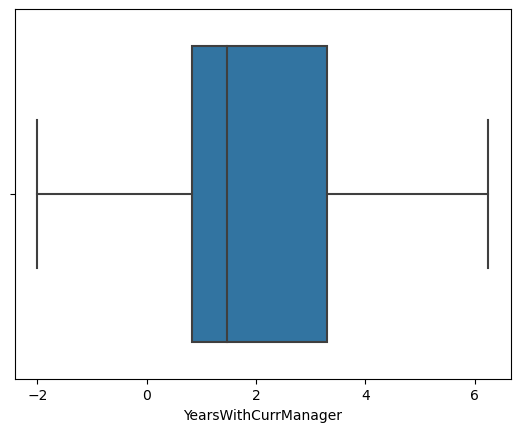

In [50]:
sns.boxplot(df['YearsWithCurrManager'])

Age                            AxesSubplot(0.125,0.786098;0.133621x0.0939024)
DailyRate                   AxesSubplot(0.285345,0.786098;0.133621x0.0939024)
DistanceFromHome             AxesSubplot(0.44569,0.786098;0.133621x0.0939024)
Education                   AxesSubplot(0.606034,0.786098;0.133621x0.0939024)
EmployeeNumber              AxesSubplot(0.766379,0.786098;0.133621x0.0939024)
EnvironmentSatisfaction        AxesSubplot(0.125,0.673415;0.133621x0.0939024)
HourlyRate                  AxesSubplot(0.285345,0.673415;0.133621x0.0939024)
JobInvolvement               AxesSubplot(0.44569,0.673415;0.133621x0.0939024)
JobLevel                    AxesSubplot(0.606034,0.673415;0.133621x0.0939024)
JobSatisfaction             AxesSubplot(0.766379,0.673415;0.133621x0.0939024)
MonthlyIncome                  AxesSubplot(0.125,0.560732;0.133621x0.0939024)
MonthlyRate                 AxesSubplot(0.285345,0.560732;0.133621x0.0939024)
NumCompaniesWorked           AxesSubplot(0.44569,0.560732;0.1336

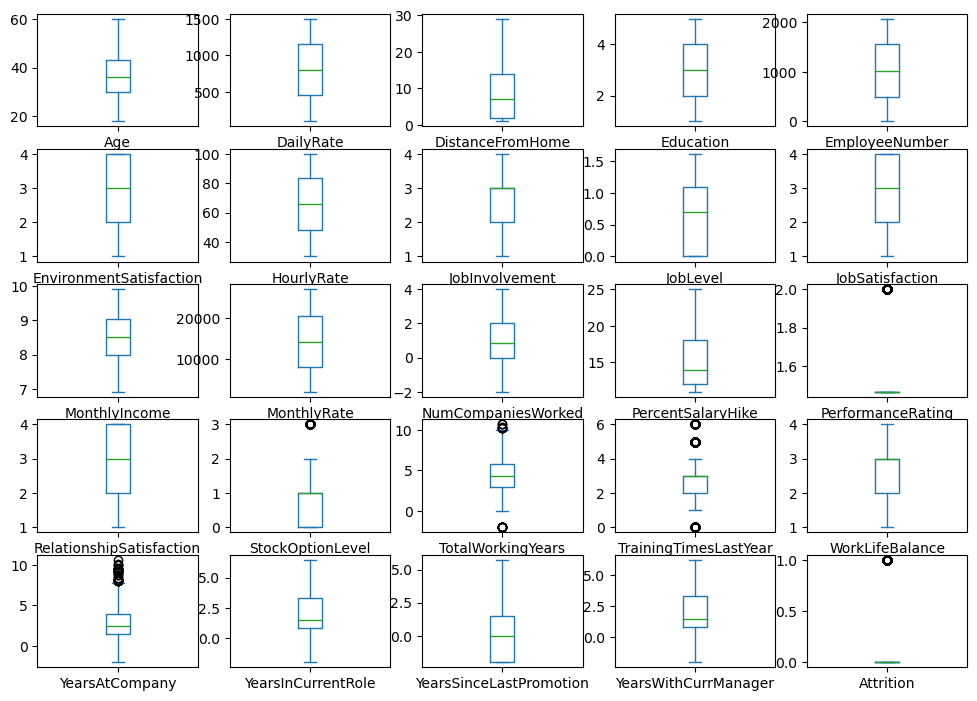

In [51]:
df.plot(kind='box',figsize=(12,12),layout=(7,5),subplots=True)

Now the outliers and skeness have been reduced of almost all the features at possibly best.

So we are converting all the Object Data types to Nemeric values, so that our ML Model can read the same

In [52]:
for c in df.select_dtypes(include="object").columns:
    df[c]=le.fit_transform(df[c].astype(str))

In [53]:
df.dtypes

Age                           int64
BusinessTravel                int32
DailyRate                     int64
Department                    int32
DistanceFromHome              int64
Education                     int64
EducationField                int32
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                        int32
HourlyRate                    int64
JobInvolvement                int64
JobLevel                    float64
JobRole                       int32
JobSatisfaction               int64
MaritalStatus                 int32
MonthlyIncome               float64
MonthlyRate                   int64
NumCompaniesWorked          float64
Over18                        int32
OverTime                      int32
PercentSalaryHike             int64
PerformanceRating           float64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears           float64
TrainingTimesLastYear         int64
WorkLifeBalance             

We are separating our Independent Variables & the Target Variable as below

In [54]:
x=df.iloc[:,0:-1]

In [55]:
y=df.iloc[:,-1]

In [56]:
x.shape

(1470, 32)

In [57]:
y.shape

(1470,)

We are going to apply different Classification Alorithms with different Random States from 0 to 50 to check and get the best possible Accuracy Score of "Attrition" Prediction.

In [58]:
lr=LogisticRegression()

In [59]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    lr.fit(xtrain,ytrain)
    pred1=lr.predict(xtest)
    ascore=accuracy_score(ytest,pred1)
    print(ascore)

0.8480725623582767
0.8231292517006803
0.8480725623582767
0.8344671201814059
0.8367346938775511
0.8321995464852607
0.8458049886621315
0.8435374149659864
0.8412698412698413
0.8344671201814059
0.8095238095238095
0.8480725623582767
0.8321995464852607
0.8412698412698413
0.8639455782312925
0.8390022675736961
0.8480725623582767
0.8435374149659864
0.8412698412698413
0.8321995464852607
0.8435374149659864
0.8412698412698413
0.81859410430839
0.8231292517006803
0.8321995464852607
0.8435374149659864
0.8684807256235828
0.8344671201814059
0.8321995464852607
0.854875283446712
0.8390022675736961
0.8639455782312925
0.8367346938775511
0.8276643990929705
0.8526077097505669
0.873015873015873
0.8503401360544217
0.8571428571428571
0.8480725623582767
0.8503401360544217
0.8435374149659864
0.8503401360544217
0.8571428571428571
0.81859410430839
0.8594104308390023
0.8299319727891157
0.8208616780045351
0.8503401360544217
0.8526077097505669
0.8367346938775511


In [60]:
dt=DecisionTreeClassifier()

In [61]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    dt.fit(xtrain,ytrain)
    pred2=dt.predict(xtest)
    ascore=accuracy_score(ytest,pred2)
    print(ascore)

0.7709750566893424
0.782312925170068
0.7777777777777778
0.800453514739229
0.7755102040816326
0.7687074829931972
0.7505668934240363
0.8163265306122449
0.7664399092970522
0.7732426303854876
0.7528344671201814
0.780045351473923
0.764172335600907
0.7755102040816326
0.7936507936507936
0.7732426303854876
0.7959183673469388
0.7845804988662132
0.7777777777777778
0.7619047619047619
0.8072562358276644
0.746031746031746
0.7369614512471655
0.7619047619047619
0.7596371882086168
0.7755102040816326
0.800453514739229
0.7709750566893424
0.7619047619047619
0.800453514739229
0.7936507936507936
0.782312925170068
0.780045351473923
0.7959183673469388
0.7913832199546486
0.7981859410430839
0.8027210884353742
0.8253968253968254
0.7573696145124716
0.7414965986394558
0.782312925170068
0.800453514739229
0.7732426303854876
0.7687074829931972
0.7687074829931972
0.7505668934240363
0.7868480725623582
0.782312925170068
0.8072562358276644
0.8095238095238095


In [62]:
gnb=GaussianNB()

In [63]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    gnb.fit(xtrain,ytrain)
    pred3=gnb.predict(xtest)
    ascore=accuracy_score(ytest,pred3)
    print(ascore)

0.8344671201814059
0.854875283446712
0.8412698412698413
0.7913832199546486
0.8072562358276644
0.8072562358276644
0.8458049886621315
0.8027210884353742
0.7959183673469388
0.8299319727891157
0.8367346938775511
0.8775510204081632
0.8344671201814059
0.8117913832199547
0.8276643990929705
0.8163265306122449
0.8367346938775511
0.8208616780045351
0.8208616780045351
0.8276643990929705
0.8072562358276644
0.8390022675736961
0.7891156462585034
0.8299319727891157
0.8072562358276644
0.8095238095238095
0.8435374149659864
0.8072562358276644
0.8095238095238095
0.8027210884353742
0.8163265306122449
0.8095238095238095
0.8684807256235828
0.8412698412698413
0.8321995464852607
0.8208616780045351
0.8299319727891157
0.8435374149659864
0.81859410430839
0.8299319727891157
0.8526077097505669
0.8480725623582767
0.8163265306122449
0.7936507936507936
0.8480725623582767
0.8367346938775511
0.7891156462585034
0.7845804988662132
0.8321995464852607
0.8299319727891157


In [64]:
bnb=BernoulliNB()

In [65]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    bnb.fit(xtrain,ytrain)
    pred4=bnb.predict(xtest)
    ascore=accuracy_score(ytest,pred4)
    print(ascore)

0.8117913832199547
0.800453514739229
0.8321995464852607
0.8049886621315193
0.8072562358276644
0.8049886621315193
0.8571428571428571
0.8367346938775511
0.8049886621315193
0.8140589569160998
0.8027210884353742
0.8639455782312925
0.8208616780045351
0.8072562358276644
0.8344671201814059
0.800453514739229
0.8231292517006803
0.81859410430839
0.8072562358276644
0.8231292517006803
0.8095238095238095
0.8140589569160998
0.7732426303854876
0.8253968253968254
0.8049886621315193
0.7981859410430839
0.8344671201814059
0.81859410430839
0.7959183673469388
0.8027210884353742
0.8163265306122449
0.81859410430839
0.8412698412698413
0.8231292517006803
0.8072562358276644
0.81859410430839
0.8321995464852607
0.8594104308390023
0.8276643990929705
0.8253968253968254
0.8390022675736961
0.8412698412698413
0.8163265306122449
0.7868480725623582
0.81859410430839
0.8367346938775511
0.8049886621315193
0.8049886621315193
0.8163265306122449
0.8276643990929705


In [66]:
rf=RandomForestClassifier()

In [67]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    rf.fit(xtrain,ytrain)
    pred5=rf.predict(xtest)
    ascore=accuracy_score(ytest,pred5)
    print(ascore)

0.8684807256235828
0.8412698412698413
0.8684807256235828
0.8412698412698413
0.8594104308390023
0.8503401360544217
0.873015873015873
0.8594104308390023
0.8571428571428571
0.8367346938775511
0.8253968253968254
0.8571428571428571
0.8526077097505669
0.8503401360544217
0.8752834467120182
0.8503401360544217
0.854875283446712
0.8435374149659864
0.8526077097505669
0.8390022675736961
0.8616780045351474
0.8480725623582767
0.8276643990929705
0.8412698412698413
0.8480725623582767
0.8571428571428571
0.8979591836734694
0.8435374149659864
0.854875283446712
0.8571428571428571
0.8526077097505669
0.873015873015873
0.854875283446712
0.8344671201814059
0.8594104308390023
0.873015873015873
0.8526077097505669
0.8684807256235828
0.854875283446712
0.8594104308390023
0.8662131519274376
0.8752834467120182
0.8639455782312925
0.8390022675736961
0.8775510204081632
0.8526077097505669
0.8344671201814059
0.854875283446712
0.8684807256235828
0.8390022675736961


In [68]:
kn=KNeighborsClassifier()

In [69]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    kn.fit(xtrain,ytrain)
    pred6=kn.predict(xtest)
    ascore=accuracy_score(ytest,pred6)
    print(ascore)

0.8276643990929705
0.8163265306122449
0.8231292517006803
0.8095238095238095
0.8140589569160998
0.8072562358276644
0.81859410430839
0.8367346938775511
0.8299319727891157
0.8072562358276644
0.7755102040816326
0.8208616780045351
0.8231292517006803
0.8049886621315193
0.8276643990929705
0.8163265306122449
0.8163265306122449
0.8049886621315193
0.8117913832199547
0.8049886621315193
0.8117913832199547
0.7936507936507936
0.8027210884353742
0.8072562358276644
0.8163265306122449
0.8208616780045351
0.854875283446712
0.7891156462585034
0.8140589569160998
0.8117913832199547
0.8163265306122449
0.8321995464852607
0.8049886621315193
0.8027210884353742
0.8049886621315193
0.8390022675736961
0.8163265306122449
0.8299319727891157
0.8231292517006803
0.8208616780045351
0.8027210884353742
0.8140589569160998
0.8095238095238095
0.800453514739229
0.8321995464852607
0.7868480725623582
0.800453514739229
0.8208616780045351
0.8253968253968254
0.8095238095238095


In [70]:
sg=SGDClassifier()

In [71]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    sg.fit(xtrain,ytrain)
    pred7=sg.predict(xtest)
    ascore=accuracy_score(ytest,pred7)
    print(ascore)

0.5351473922902494
0.8253968253968254
0.8390022675736961
0.8299319727891157
0.4217687074829932
0.17233560090702948
0.8458049886621315
0.8412698412698413
0.8412698412698413
0.8299319727891157
0.19954648526077098
0.8435374149659864
0.8390022675736961
0.15873015873015872
0.8571428571428571
0.37188208616780044
0.8503401360544217
0.8321995464852607
0.8412698412698413
0.24036281179138322
0.8412698412698413
0.8321995464852607
0.81859410430839
0.8231292517006803
0.8321995464852607
0.8412698412698413
0.8639455782312925
0.8321995464852607
0.17687074829931973
0.7709750566893424
0.8435374149659864
0.14512471655328799
0.8344671201814059
0.8276643990929705
0.15192743764172337
0.8662131519274376
0.8412698412698413
0.8571428571428571
0.8503401360544217
0.7709750566893424
0.1655328798185941
0.854875283446712
0.8616780045351474
0.8163265306122449
0.854875283446712
0.81859410430839
0.8163265306122449
0.8412698412698413
0.8458049886621315
0.17006802721088435


In [72]:
rg=RidgeClassifier()

In [73]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    rg.fit(xtrain,ytrain)
    pred8=rg.predict(xtest)
    ascore=accuracy_score(ytest,pred8)
    print(ascore)

0.8662131519274376
0.8526077097505669
0.854875283446712
0.8571428571428571
0.8662131519274376
0.8435374149659864
0.8616780045351474
0.8662131519274376
0.8571428571428571
0.8503401360544217
0.8344671201814059
0.8684807256235828
0.8707482993197279
0.8616780045351474
0.8798185941043084
0.854875283446712
0.873015873015873
0.8503401360544217
0.873015873015873
0.8458049886621315
0.8571428571428571
0.8594104308390023
0.8412698412698413
0.8412698412698413
0.8412698412698413
0.8526077097505669
0.8956916099773242
0.8412698412698413
0.8480725623582767
0.873015873015873
0.8639455782312925
0.9024943310657596
0.8571428571428571
0.8435374149659864
0.8616780045351474
0.891156462585034
0.8684807256235828
0.873015873015873
0.8639455782312925
0.8639455782312925
0.8684807256235828
0.8707482993197279
0.8775510204081632
0.8390022675736961
0.8752834467120182
0.8458049886621315
0.8458049886621315
0.8707482993197279
0.8616780045351474
0.8571428571428571


By using above many Classification Algos with many Random States, although all the Algos and Random States are working fine, but we found that the Random Forest Classifier is giving approximately 89% accurate prediction with 27th Random State and Ridge Classifier is giving approximately 90% accurate prediction with 32th Random State.

So we can further check above 2 best Algos, by reducing some of our Features using Feature Selection method as below.

In [74]:
sf1=RFE(RandomForestClassifier(),n_features_to_select=30)
sdf1=sf1.fit_transform(x,y)
for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(sdf1,y,test_size=0.30,random_state=i)
    rf.fit(xtrain,ytrain)
    spred1=rf.predict(xtest)
    ascore=accuracy_score(y_test,spred1)
    print(ascore)

0.8231292517006803
0.8140589569160998
0.8367346938775511
0.8072562358276644
0.8140589569160998
0.8163265306122449
0.8344671201814059
0.8321995464852607
0.8231292517006803
0.8163265306122449
0.7936507936507936
0.8140589569160998
0.81859410430839
0.8276643990929705
0.8412698412698413
0.8253968253968254
0.8299319727891157
0.8208616780045351
0.8299319727891157
0.8095238095238095
0.8231292517006803
0.8117913832199547
0.8095238095238095
0.8095238095238095
0.8163265306122449
0.8231292517006803
0.8412698412698413
0.81859410430839
0.8027210884353742
0.8299319727891157
0.8390022675736961
0.8480725623582767
0.8276643990929705
0.8163265306122449
0.8321995464852607
0.8390022675736961
0.8208616780045351
0.8367346938775511
0.8276643990929705
0.8140589569160998
0.8367346938775511
0.8435374149659864
0.8435374149659864
0.7891156462585034
0.8435374149659864
0.8117913832199547
0.800453514739229
0.8276643990929705
0.8276643990929705
0.8458049886621315


In [75]:
sf2=RFE(RidgeClassifier(),n_features_to_select=30)
sdf2=sf2.fit_transform(x,y)
for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(sdf2,y,test_size=0.30,random_state=i)
    rg.fit(xtrain,ytrain)
    spred2=rg.predict(xtest)
    ascore=accuracy_score(y_test,spred2)
    print(ascore)

0.8140589569160998
0.8117913832199547
0.8435374149659864
0.8027210884353742
0.81859410430839
0.8049886621315193
0.8321995464852607
0.8095238095238095
0.8140589569160998
0.8027210884353742
0.7732426303854876
0.81859410430839
0.8072562358276644
0.81859410430839
0.8299319727891157
0.8072562358276644
0.8231292517006803
0.8049886621315193
0.8140589569160998
0.8095238095238095
0.8140589569160998
0.81859410430839
0.7913832199546486
0.7868480725623582
0.800453514739229
0.8140589569160998
0.8276643990929705
0.8140589569160998
0.800453514739229
0.8208616780045351
0.8208616780045351
0.8344671201814059
0.8163265306122449
0.8049886621315193
0.8253968253968254
0.8344671201814059
0.81859410430839
0.8253968253968254
0.8140589569160998
0.8095238095238095
0.8117913832199547
0.8276643990929705
0.8253968253968254
0.7936507936507936
0.8321995464852607
0.7936507936507936
0.7845804988662132
0.8095238095238095
0.8276643990929705
0.8571428571428571


By reducing & selecting the best Features using Feature Selection method, we observed that even leaving 1 or 2 Features, our Accuracy Score is getting down, so it is proving that all the current Features are best and required for our best Classification ML Model.

In [76]:
cv1=cross_val_score(rg,x,y,cv=KFold(n_splits=6))

In [77]:
cv1

array([0.87346939, 0.87346939, 0.86530612, 0.84489796, 0.86122449,
       0.86530612])

In [78]:
cv1.mean()

0.8639455782312925

In [79]:
cv2=cross_val_score(rg,x,y,cv=StratifiedKFold(n_splits=6))

In [80]:
cv2

array([0.87346939, 0.85714286, 0.87346939, 0.86530612, 0.85714286,
       0.85306122])

In [81]:
cv2.mean()

0.863265306122449

In [82]:
cv3=cross_val_score(rg,x,y,cv=ShuffleSplit(train_size=0.7,test_size=0.3,n_splits=6))

In [83]:
cv3

array([0.8707483 , 0.87755102, 0.87981859, 0.86621315, 0.86848073,
       0.84126984])

In [84]:
cv3.mean()

0.8673469387755102

By using the above 3 methods of cross validation also, we are getting the average prediction accuracy of above 86% with 6 folds each on above 3 cv methods for Ridge Classifier.

In [85]:
gs1=GridSearchCV(estimator=rg,param_grid={'alpha':[0.5,1.0,1.5,2.0],'fit_intercept':[True,False],'normalize':[True,False]},scoring='accuracy',cv=9)

In [86]:
gs1.fit(xtrain,ytrain)

GridSearchCV(cv=9, estimator=RidgeClassifier(),
             param_grid={'alpha': [0.5, 1.0, 1.5, 2.0],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring='accuracy')

In [87]:
rgtune=gs1.best_estimator_.predict(xtest)

In [88]:
accuracy_score(ytest,rgtune)

0.8571428571428571

In [89]:
confusion_matrix(ytest,rgtune)

array([[364,   2],
       [ 61,  14]], dtype=int64)

In [90]:
gs2=GridSearchCV(estimator=rf,param_grid={'max_depth':[2,4,6],'max_features':[4,5],'min_samples_leaf':[2,3,4]},scoring='accuracy',cv=9,refit=True,return_train_score=True)

In [91]:
gs2.fit(xtrain,ytrain)

GridSearchCV(cv=9, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 6], 'max_features': [4, 5],
                         'min_samples_leaf': [2, 3, 4]},
             return_train_score=True, scoring='accuracy')

In [92]:
rftune=gs2.best_estimator_.predict(xtest)

In [93]:
accuracy_score(ytest,rftune)

0.8344671201814059

In [94]:
confusion_matrix(ytest,rftune)

array([[364,   2],
       [ 71,   4]], dtype=int64)

After applying the Hyperparameter Tuning in our Ridge & Random Forest Models, we have got above 85% & 83% accurate predictions respectively. But in the confusion matrix the False Negative portion is higher than True Negative. So we are going to try to shift the False Negative towards True Negative by using the Threshold limit method.

In [95]:
thpred1=(rg.decision_function(xtest)>=0.0005).astype(int)

In [96]:
confusion_matrix(ytest,thpred1)

array([[364,   2],
       [ 61,  14]], dtype=int64)

In [97]:
accuracy_score(ytest,thpred1)

0.8571428571428571

In [98]:
thpred2=((rf.predict_proba(xtest)[:,1])>=0.3).astype(int)

In [99]:
confusion_matrix(ytest,thpred2)

array([[343,  23],
       [ 38,  37]], dtype=int64)

In [100]:
accuracy_score(ytest,thpred2)

0.8616780045351474

By using above Threshold limit methods on both the models Ridge Classifier & Random Forest Classifier, we have observed that if we got success to shift False Negative to True Negative, but the Accuracy Score remains approximately same and that's why the some of the True Possitive also shifts towards False Positive.

So ultimately as per our concern the Ridge Classifier is working a little better than Random Forest Classifier. So we are going to save our Ridge Classifier ML Model via Pickle method.

In [101]:
pickle.dump(rg, open('attrition', 'wb'))

In [102]:
rg_model=pickle.load(open('attrition', 'rb'))

In [103]:
rg_model_pred=rg_model.predict(xtest)

In [104]:
rg_model_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [105]:
accuracy_score(ytest,rg_model_pred)

0.8571428571428571

In [106]:
confusion_matrix(ytest,rg_model_pred)

array([[364,   2],
       [ 61,  14]], dtype=int64)

We have saved our rg Model (Ridge Classifier) and by applying the same, got above 85% prediction accuracy and maximum number of prediction lies in the portion of True Possitive.